3.0
Selected Game:  Call of Duty: Modern Warfare 3

Recommended Games: 

Call of Duty: Black Ops
Call of Duty: Black Ops II
Call of Duty: Modern Warfare 2
Call of Duty: Ghosts
Call of Duty 4: Modern Warfare




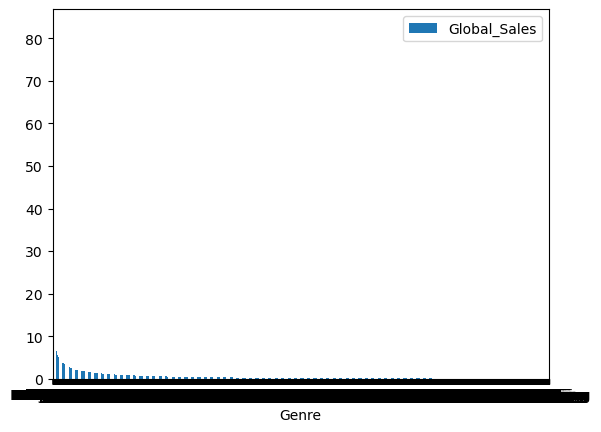

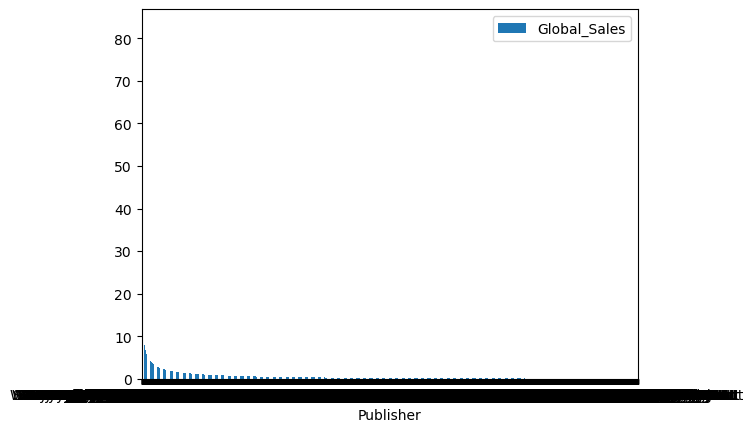

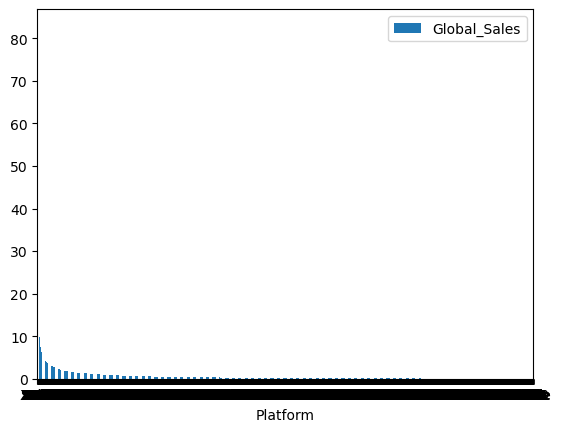

In [1]:

import pandas as pd
from matplotlib import pyplot as plt
#importing and cleaning dataset
gamedf=pd.read_csv(r"vgsales.csv")
gamedf.convert_dtypes().dtypes
gamedf=gamedf.dropna()
gamedf=gamedf.drop('Year',axis=1)
gamedf=gamedf.drop('NA_Sales',axis=1)
gamedf=gamedf.drop('EU_Sales',axis=1)
gamedf=gamedf.drop('JP_Sales',axis=1)
gamedf=gamedf.drop('Other_Sales',axis=1)
gamedf.head
#Visualization
x=gamedf['Genre']
y=gamedf['Global_Sales']
ax=gamedf.plot.bar(x='Genre', y='Global_Sales',rot=0)

bx=gamedf.plot.bar(x='Publisher', y='Global_Sales',rot=0)

cx=gamedf.plot.bar(x='Platform', y='Global_Sales',rot=0)
#lists of columns
genreList = gamedf['Genre'].unique().tolist()
publisherList =gamedf['Publisher'].unique().tolist()
platformList=gamedf['Platform'].unique().tolist()
#for multiple genres
def binarygen(genre_list):
    binaryList = []

    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)

    return binaryList
def binarypub(publisher_list):
    binaryList = []

    for pub in publisherList:
        if pub in publisher_list:
            binaryList.append(1)
        else:
            binaryList.append(0)

    return binaryList
def binaryplat(plat_list):
    binaryList=[]

    for plat in platformList:
        if plat in plat_list:
            binaryList.append(1)
        else:
            binaryList.append(0)

    return binaryList

gamedf['Genre_multiple'] = gamedf['Genre'].apply(lambda x: binarygen(x))
gamedf['Plat_multiple'] = gamedf['Platform'].apply(lambda x: binaryplat(x))
gamedf['Publisher_multiple'] = gamedf['Publisher'].apply(lambda x: binarypub(x))
gamedf.head()
from scipy import spatial
def Similarity(n1, n2):
    a = gamedf.iloc[n1]
    b = gamedf.iloc[n2]

    genreA = a['Genre_multiple']
    genreB = b['Genre_multiple']

    genreDistance = spatial.distance.cosine(genreA, genreB)

    PlatformA = a['Plat_multiple']
    PlatformB = b['Plat_multiple']

    PlatformDistance = spatial.distance.cosine(PlatformA, PlatformB)

    PublisherA = a['Publisher_multiple']
    PublisherB = b['Publisher_multiple']
    PublisherDistance = spatial.distance.cosine(PublisherA, PublisherB)
    return genreDistance+PlatformDistance+PublisherDistance
print(Similarity(9,85))
import operator
def getNeighbors(basegame, K):
    distances = []

    for index, game in gamedf.iterrows():
        if game['Rank'] == 16291:
            break
        if game['Rank'] != basegame['Rank'].values[0]:
            dist = Similarity(basegame['Rank'].values[0], game['Rank'])
            distances.append((game['Rank'], dist))

    distances.sort(key=operator.itemgetter(1))
    neighbors = []

    for x in range(K):
        neighbors.append(distances[x])
    return neighbors

def predict_score():
    name = input('Enter a game name :  ')
    new_game = gamedf[gamedf['Name'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Game: ',new_game.Name.values[0])
    K = 5
    neighbors = getNeighbors(new_game, K)
    print('\nRecommended Games: \n')
    for neighbor in neighbors:
        print( gamedf.iloc[neighbor[0]][1] )

    print('\n')
predict_score()


 